In [1]:
import cv2
import numpy as np
import os
import sys
import json
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
# for all json in data/droplets

count_cells = []
for json_file in os.listdir('data/generated'):
    if json_file.endswith('.json'):
        file = json.load(open('data/generated/' + json_file))
        for cell in file['cell']:
            if len(cell) > 0 and len(cell) < 200:
                count_cells.append(len(cell))

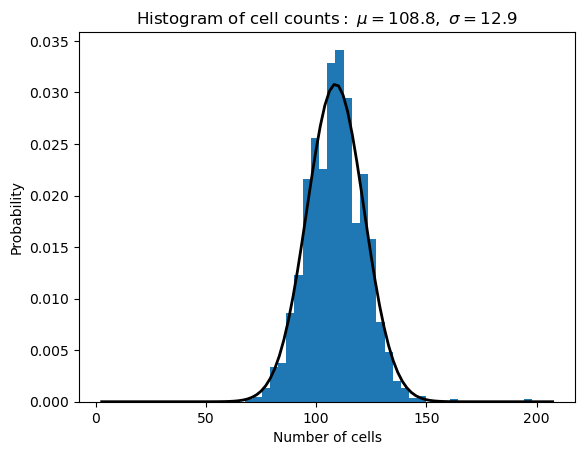

In [3]:
count_cells = np.array(count_cells)
plt.hist(count_cells, bins=50, density=True)
# add a simple normal distribution fit
mu, std = norm.fit(count_cells)
# add a normal distribution with mu and std
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Number of cells')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ cell\ counts:}\ \mu=%.1f,\ \sigma=%.1f$' % (mu, std))
plt.show()

In [4]:
# load with cv2 multi read data/droplets

images = []

for tif_file in os.listdir('data/droplets'):
    if tif_file.endswith('.tif'):
        img = cv2.imreadmulti('data/droplets/' + tif_file)[1]
        for im in img:
            images.append(im)

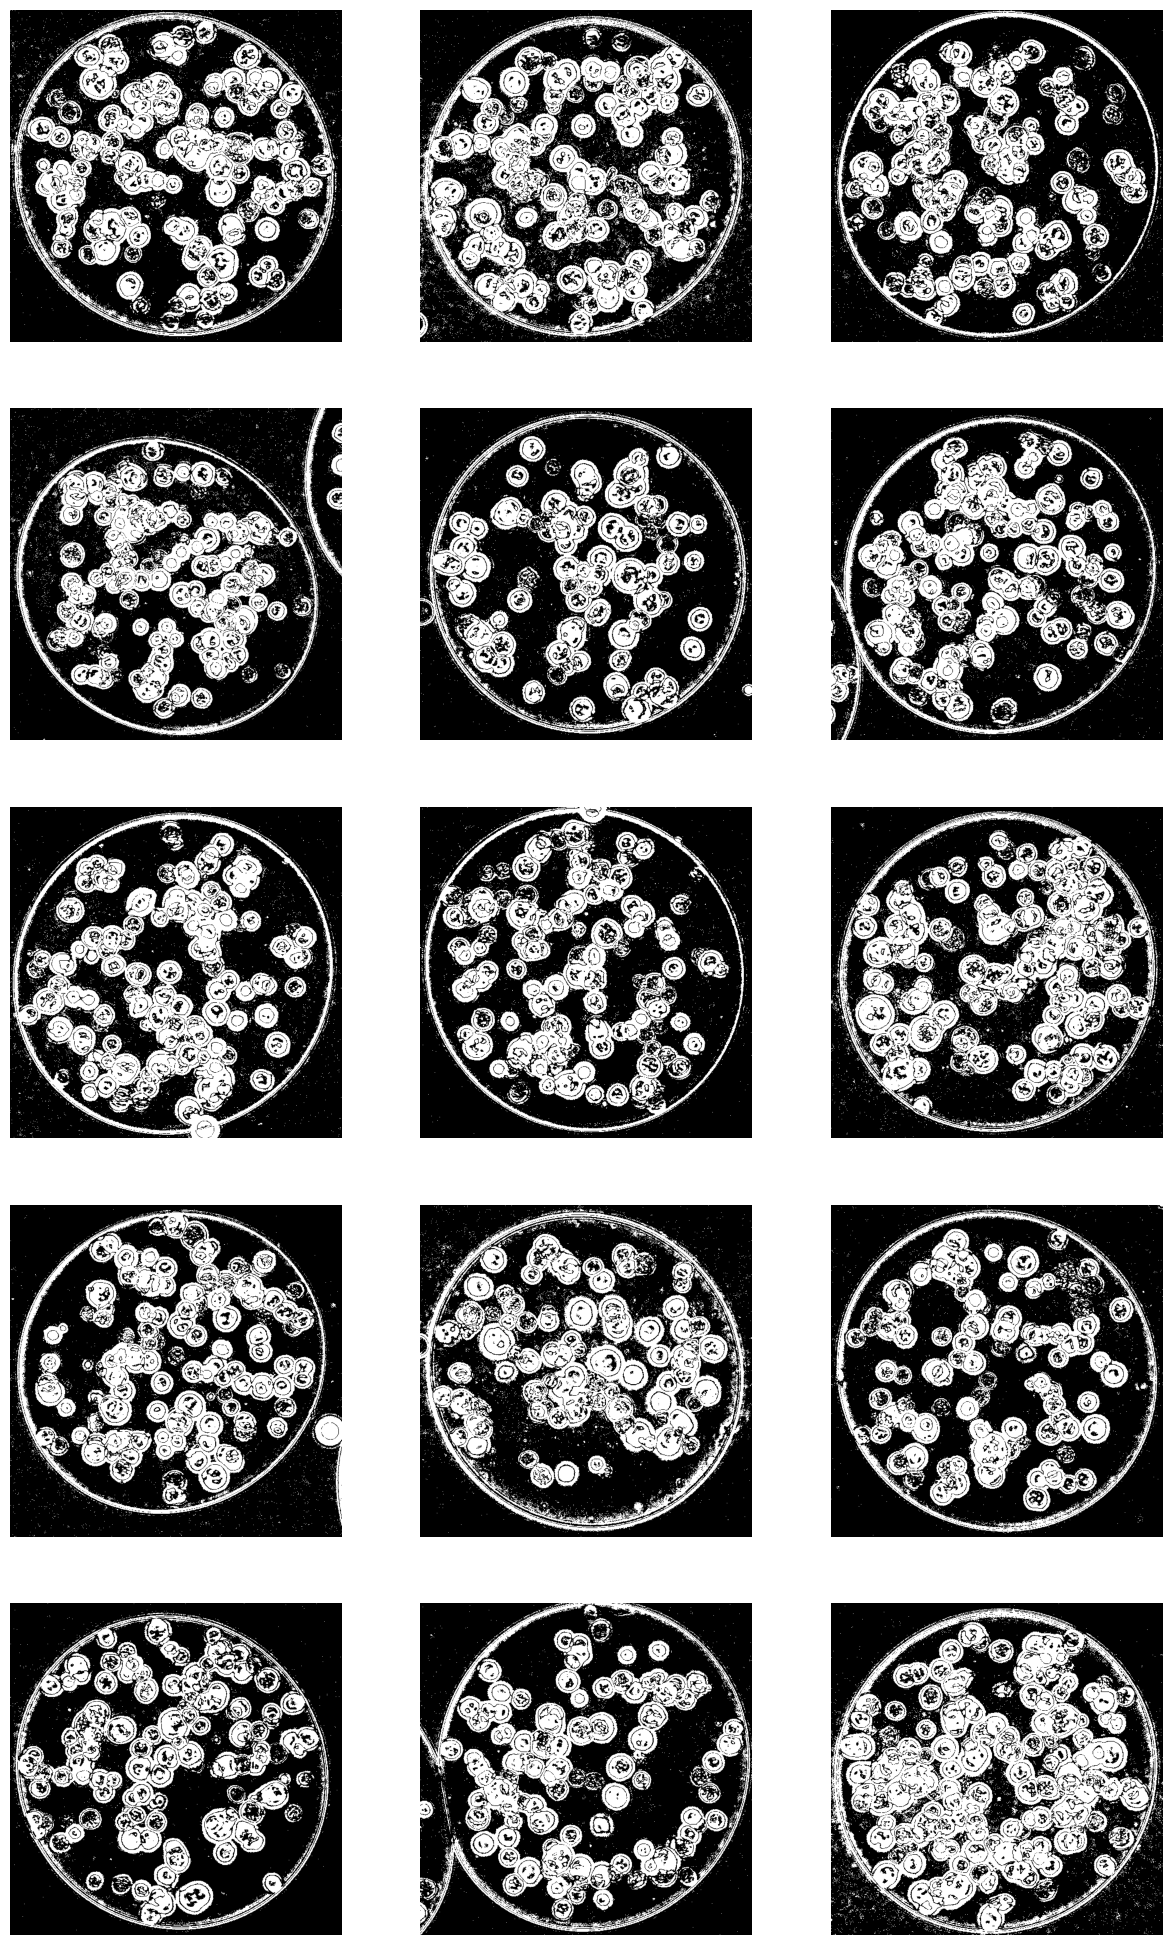

In [5]:
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
for ax in axs.flatten():
    ax.imshow(images[np.random.randint(len(images))], cmap='gray')
    ax.axis('off')  
plt.show()

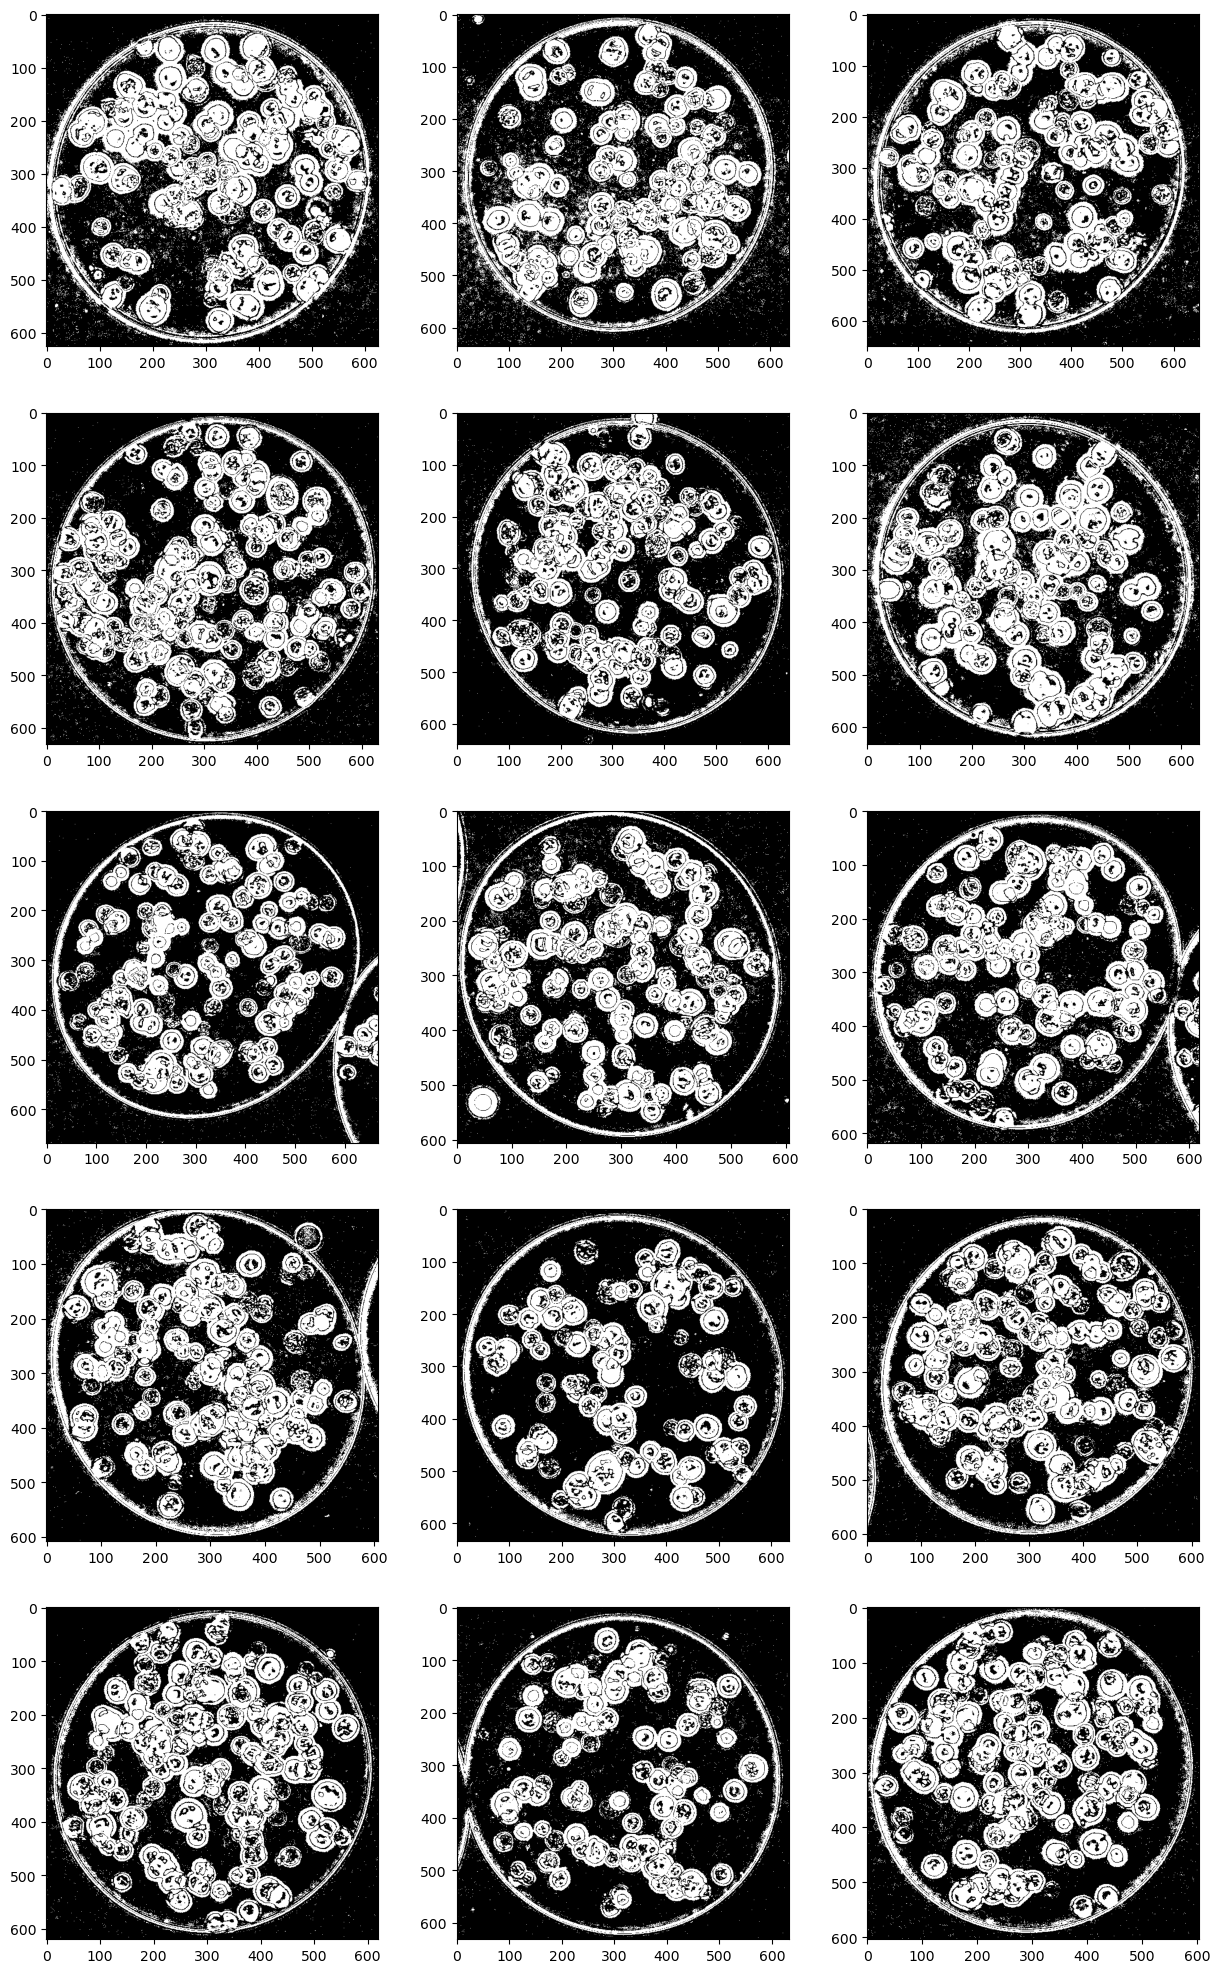

In [6]:
# use a mean filter to remove noise

images_mean = images.copy()
# for im in images:
#     images_mean.append(cv2.medianBlur(im, 5))

fig, axs = plt.subplots(5, 3, figsize=(15, 25))
for ax in axs.flatten():
    ax.imshow(images_mean[np.random.randint(len(images_mean))], cmap='gray')
#     ax.axis('off')

In [8]:
images_circle = []
for im in images_mean[:10]:
    circles = cv2.HoughCircles(im, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=250, maxRadius=350)
    mask = np.zeros_like(im)
    if circles is not None:
        circle = np.array(circles[0][0], dtype=int)
        mask = cv2.circle(mask, (circle[0],circle[1]), circle[2], (255, 255, 255), -1)
        images_circle.append(cv2.bitwise_and(im, mask))
    else:
        images_circle.append(im)


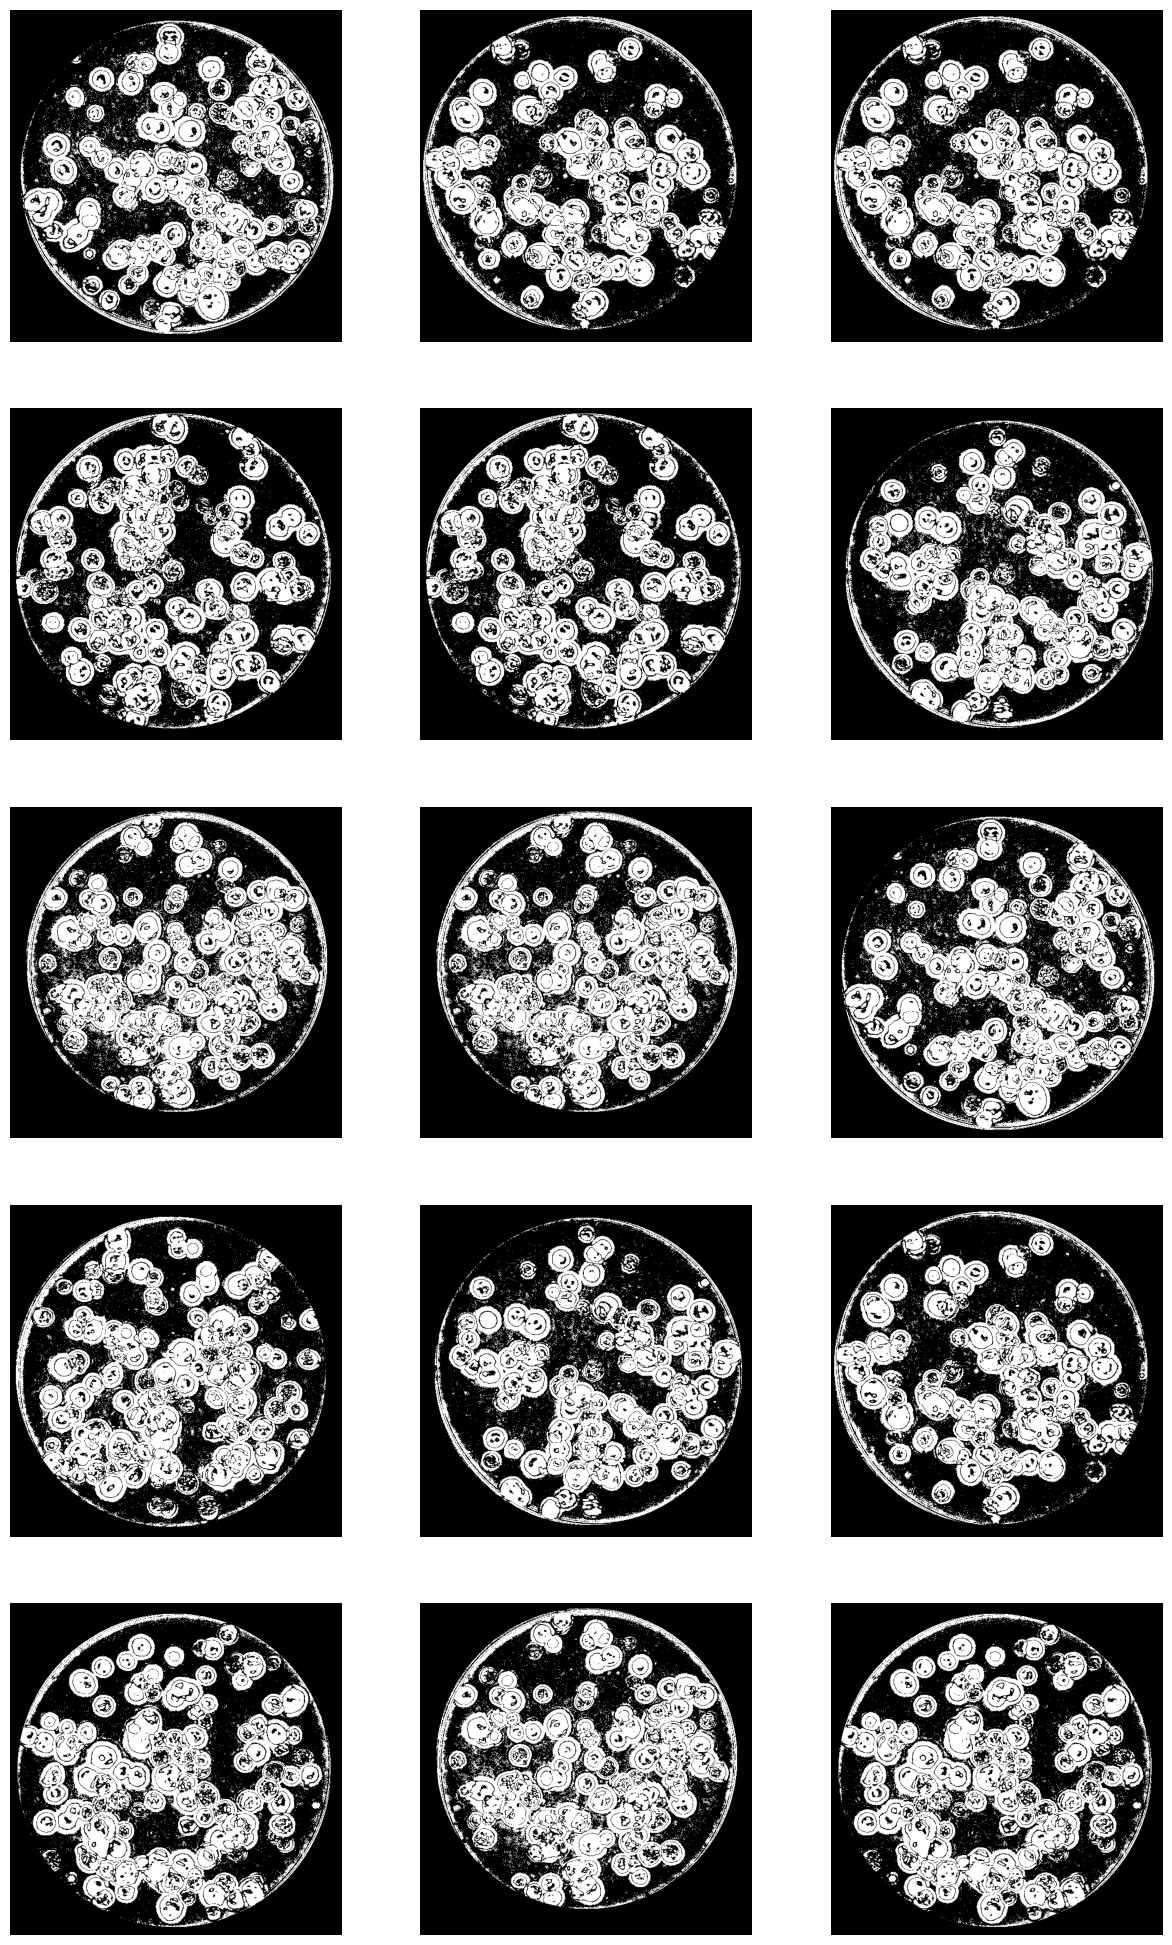

In [9]:
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
for ax in axs.flatten():
    ax.imshow(images_circle[np.random.randint(len(images_circle))], cmap='gray')
    ax.axis('off')

In [10]:
cell_list = []
for im in images_circle:
    circles = cv2.HoughCircles(im, cv2.HOUGH_GRADIENT, 1, 5, param1=50, param2=30, minRadius=10, maxRadius=20)
    if circles is not None:
        cell_list.append(circles[0])
    else:
        cell_list.append([])

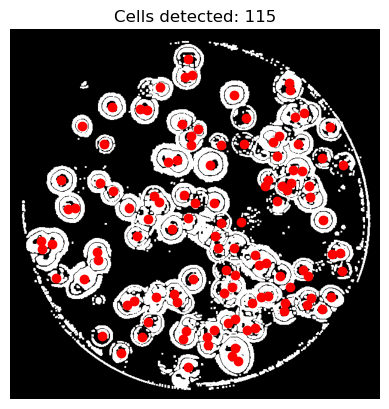

In [41]:
im = images_circle[2]
# opening on image
im = cv2.morphologyEx(im, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))

circles = cv2.HoughCircles(im, cv2.HOUGH_GRADIENT, 1, 12, param1=50, param2=15, minRadius=15, maxRadius=30)
# plot all circles on the image
plt.imshow(im, cmap='gray')
for circle in circles[0]:
    plt.plot(circle[0], circle[1], 'ro')
plt.axis('off')
plt.title('Cells detected: ' + str(len(circles[0])))
plt.show()
